# Import Libraries

In [36]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Load tshirt image

In [37]:
image = cv2.imread('tshirts/1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

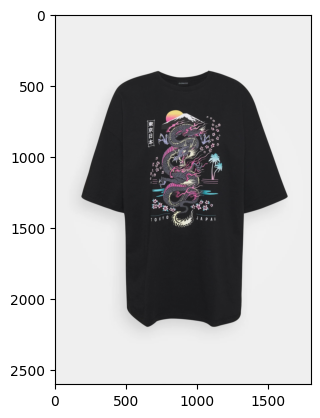

In [38]:
plt.imshow(image)

# Detect edges

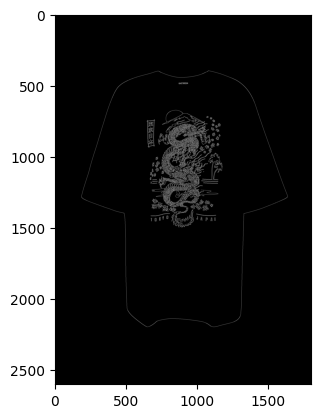

In [39]:
blur = cv2.bilateralFilter(image,13,75,75)
canny = cv2.Canny(blur,100,200)
plt.imshow(canny,cmap='gray')

# Find Contour

In [40]:
#contour detection from the image
contours, hierarchy = cv2.findContours(canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [41]:
# Find the largest contour
largest_contour = max(contours, key=cv2.contourArea)

In [42]:
# Mask Generation for T-shirt

In [43]:
# mask created for the image
image_copy = image.copy()
mask_initial = cv2.drawContours(image_copy, [largest_contour], -1, (0), thickness=cv2.FILLED)
mask_initial_gray = cv2.cvtColor(mask_initial,cv2.COLOR_BGR2GRAY)

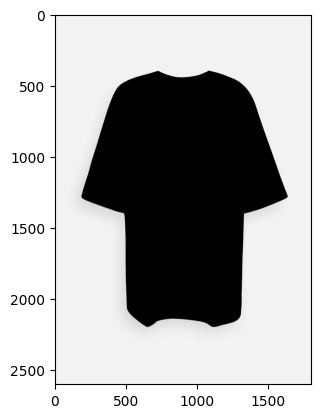

In [44]:
plt.imshow(mask_initial_gray,cmap='gray')

In [45]:
# mask -> Binary
_,thresh = cv2.threshold(mask_initial_gray,127,255,cv2.THRESH_BINARY_INV)
# thresh = cv2.adaptiveThreshold(mask_initial_gray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 10)

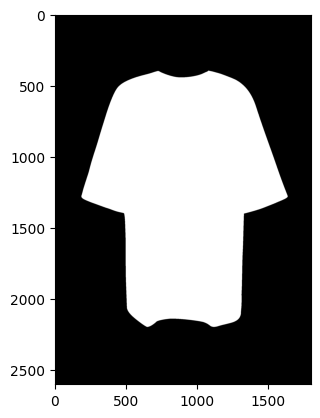

In [46]:
plt.imshow(thresh,cmap='gray')

# Crop T-shirt


In [47]:
# Contour bbox
rect = cv2.boundingRect(largest_contour)
x,y,w,h = rect

In [48]:
# crop the tshirt portion from the 3 images
crop_tshirt = image[y:y+h,x:x+w]
mask = thresh[y:y+h,x:x+w]
canny = canny[y:y+h,x:x+w]

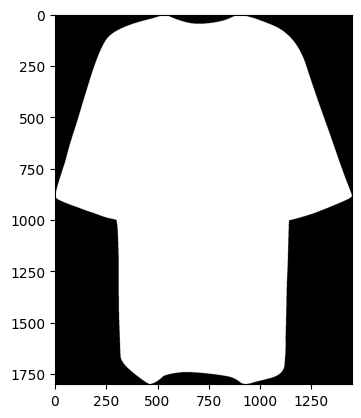

In [49]:
plt.imshow(mask,cmap='gray')

# Find Median of the cropped image

In [51]:
b,g,r = cv2.split(crop_tshirt)
b_med = int(np.median(b))
g_med = int(np.median(g))
r_med = int(np.median(r))
print(b_med,g_med,r_med)

36 36 39


In [52]:
ret = cv2.imwrite('tshirt_cropped.jpg',crop_tshirt)

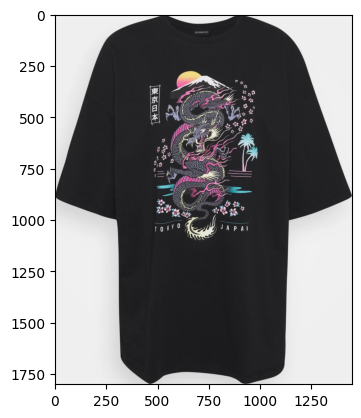

In [53]:
plt.imshow(crop_tshirt)

# Fill the outer portion with median color value

In [58]:
crop_tshirt[mask == 0] = (b_med, g_med, r_med)

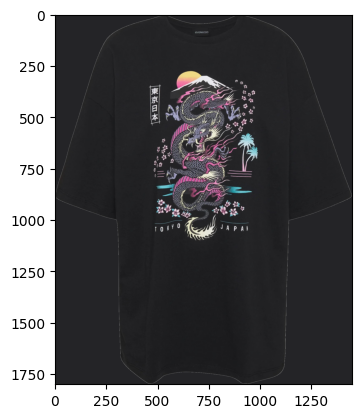

In [59]:
plt.imshow(crop_tshirt)

In [60]:
cv2.imwrite('final_processed_tshirt.jpg',crop_tshirt)

True